In [1]:
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from scipy.linalg import svd
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import center_of_mass

In [2]:
(images, _), (_, _) = mnist.load_data()
flattened = images.reshape(images.shape[0], -1)[:20000, :]
print(flattened.shape)

# SVD
svd_original = TruncatedSVD(n_components=(28*28) - 1)
svd_original.fit_transform(flattened)


(20000, 784)


array([[1655.91450794,  -69.15801126,  308.92395294, ...,    0.        ,
           0.        ,    0.        ],
       [1761.13680473,  899.97215617,  404.51252797, ...,    0.        ,
           0.        ,    0.        ],
       [ 803.83846381,  384.25642455, -336.34564156, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [1134.06544392, -520.45243014,   26.23961993, ...,    0.        ,
           0.        ,    0.        ],
       [1421.03119255, -426.67719339, -283.88668458, ...,    0.        ,
           0.        ,    0.        ],
       [1656.27555057, -568.66629584,  586.58352377, ...,    0.        ,
           0.        ,    0.        ]])

In [3]:
# polynomial kernel
gamma = 0.1 
kernel_matrix = polynomial_kernel(flattened, gamma=gamma) 
print(kernel_matrix.shape)

gamma = 0.5
kernel_matrix_2 = polynomial_kernel(flattened, gamma=gamma) 
print(kernel_matrix_2.shape)

gamma = 0.05
kernel_matrix_3 = polynomial_kernel(flattened, gamma=gamma) 
print(kernel_matrix_3.shape)

(20000, 20000)
(20000, 20000)
(20000, 20000)


In [4]:
# SVD
poly_kernel_svd = TruncatedSVD(n_components=(28*28) - 1)
poly_kernel_svd.fit_transform(kernel_matrix)

array([[ 4.13710503e+18, -5.17729484e+17,  3.82491454e+17, ...,
        -8.25046373e+15, -7.36645326e+15,  7.31341142e+14],
       [ 7.31525233e+18,  3.82094263e+18, -8.72930829e+17, ...,
        -3.59425819e+15,  4.68879927e+14,  1.58710562e+15],
       [ 5.59995417e+17, -9.98250563e+16, -5.22826172e+16, ...,
        -3.60705793e+15, -3.97945600e+15,  1.97314437e+14],
       ...,
       [ 1.13360964e+18, -5.96926374e+17,  1.07886933e+17, ...,
         4.96478856e+14, -1.88882743e+15, -1.73132320e+15],
       [ 2.25200192e+18, -8.87963840e+17, -4.09013464e+17, ...,
         1.80520286e+14,  2.81471480e+15, -1.78259404e+14],
       [ 3.78937917e+18, -1.49515769e+18,  8.42660706e+17, ...,
         1.17612499e+15,  1.05336530e+16, -2.69024405e+15]])

In [5]:

poly_kernel_svd_2 = TruncatedSVD(n_components=(28*28) - 1)
poly_kernel_svd_2.fit_transform(kernel_matrix_2)

array([[ 5.17134699e+20, -6.47159942e+19,  4.78110930e+19, ...,
         4.27978980e+17, -1.73570934e+17, -3.04370626e+17],
       [ 9.14402242e+20,  4.77615934e+20, -1.09115972e+20, ...,
         2.76496797e+17, -6.19266055e+17, -4.31303362e+17],
       [ 6.99985540e+19, -1.24780255e+19, -6.53524802e+18, ...,
        -1.07257628e+17, -7.20304795e+16, -2.79441350e+16],
       ...,
       [ 1.41699724e+20, -7.46152178e+19,  1.34857492e+19, ...,
        -9.52840109e+14, -7.66719654e+16, -3.97122881e+17],
       [ 2.81497889e+20, -1.10994800e+20, -5.11263786e+19, ...,
         3.13423241e+17,  8.40152120e+16,  2.13608493e+17],
       [ 4.73669085e+20, -1.86893915e+20,  1.05331973e+20, ...,
        -1.79785068e+17,  4.72785089e+17,  3.36302949e+17]])

In [6]:
poly_kernel_svd_3 = TruncatedSVD(n_components=(28*28) - 1)
poly_kernel_svd_3.fit_transform(kernel_matrix_3)

array([[ 5.17142417e+17, -6.47164245e+16,  4.78118552e+16, ...,
        -3.21357528e+14, -3.31843583e+14,  7.60232516e+14],
       [ 9.14411915e+17,  4.77620196e+17, -1.09116830e+17, ...,
         7.41708070e+13,  2.99812518e+14, -2.47580470e+14],
       [ 7.00005185e+16, -1.24782653e+16, -6.53542607e+15, ...,
        -2.45660414e+14,  1.50590224e+14,  2.05706656e+14],
       ...,
       [ 1.41703057e+17, -7.46165204e+16,  1.34860135e+16, ...,
        -9.72401670e+13, -1.63446397e+14,  2.13669715e+14],
       [ 2.81503178e+17, -1.10996330e+17, -5.11270636e+16, ...,
        -3.62201997e+14,  2.38403606e+14, -1.02773982e+14],
       [ 4.73676536e+17, -1.86895706e+17,  1.05333357e+17, ...,
         6.81548686e+14, -3.77663278e+14,  4.83079453e+14]])

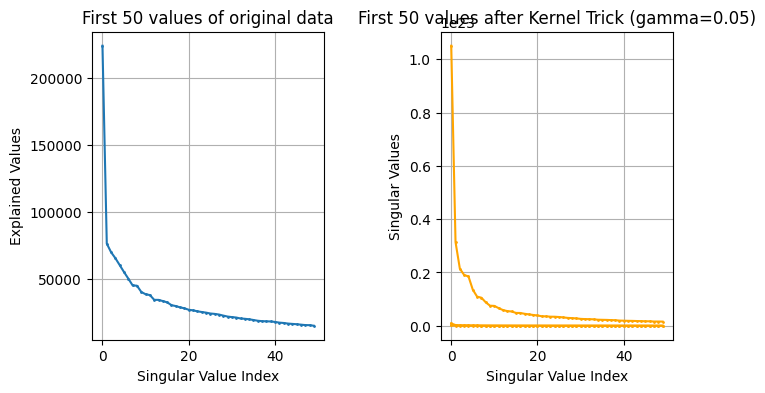

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(svd_original.singular_values_[:50], marker='o', markersize=1)
plt.title("First 50 values of original data")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Values")
plt.grid(True)

plt.subplot(132)
plt.plot(poly_kernel_svd.singular_values_[:50], marker='o', color='orange', markersize=1)
plt.title("First 50 values after Kernel Trick (gamma=0.1)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplot(132)
plt.plot(poly_kernel_svd_2.singular_values_[:50], marker='o', color='orange', markersize=1)
plt.title("First 50 values after Kernel Trick (gamma=0.5)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplot(132)
plt.plot(poly_kernel_svd_3.singular_values_[:50], marker='o', color='orange', markersize=1)
plt.title("First 50 values after Kernel Trick (gamma=0.05)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplots_adjust(wspace=0.25)
plt.show()

In [8]:
# Rbf kernel radial basis function
gamma = 0.1  
rbf_matrix_1 = rbf_kernel(flattened, gamma=gamma) 

In [9]:
gamma = 0.5
rbf_matrix_2 = rbf_kernel(flattened, gamma=gamma) 

In [10]:
gamma = 0.05 
rbf_matrix_3 = rbf_kernel(flattened, gamma=gamma) 

In [11]:
# SVD
rbf_kernel_svd = TruncatedSVD(n_components=(28*28) - 1)
rbf_kernel_svd.fit_transform(rbf_matrix_1)

array([[-0.00212583,  0.00436498, -0.00899901, ...,  0.00323105,
        -0.00211867, -0.00394435],
       [-0.0015324 , -0.00577774, -0.00991464, ..., -0.00028285,
         0.0100146 ,  0.00992305],
       [ 0.00019524, -0.00146147, -0.00929225, ...,  0.00469878,
        -0.00685504, -0.00129616],
       ...,
       [ 0.00290903, -0.00158448,  0.00260807, ...,  0.0055711 ,
         0.0079378 , -0.00480381],
       [-0.00740824, -0.00579207, -0.01481485, ...,  0.0067097 ,
         0.01035376,  0.00885293],
       [ 0.0081259 , -0.01506539,  0.00431851, ...,  0.00167192,
        -0.00514653,  0.01270608]])

In [12]:
rbf_kernel_svd_2 = TruncatedSVD(n_components=(28*28) - 1)
rbf_kernel_svd_2.fit_transform(rbf_matrix_2)

In [ ]:
rbf_kernel_svd_3 = TruncatedSVD(n_components=(28*28) - 1)
rbf_kernel_svd_3.fit_transform(rbf_matrix_3)

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(svd_original.singular_values_[:50], marker='o', markersize=1)
plt.title("First 50 values of original data")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Values")
plt.grid(True)

plt.subplot(132)
plt.plot(rbf_kernel_svd_1.singular_values_[:50], marker='o', color='orange', markersize=1)
plt.title("First 50 values after rbf kernel (gamma=0.1)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplot(132)
plt.plot(rbf_kernel_svd_2.singular_values_[:50], marker='o', color='orange', markersize=1)
plt.title("First 50 values after rbf kernel (gamma=0.5)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplot(132)
plt.plot(rbf_kernel_svd_3.singular_values_[:50], marker='o', color='orange', markersize=1)
plt.title("First 50 values after rbf kernel (gamma=0.05)")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values")
plt.grid(True)

plt.subplots_adjust(wspace=0.5)
plt.show()